# Phase 2 Project

## Project motto: Pressure is privilege!

<h3>Project Overview</h3>

SyriaTel is a telecommunications company that prides itself in offering top-notch services to their customers. They are the leading telecoms company in their country and want to remain the leader in that particular sphere. Over the years they have chartered alot of the strides in technology in their country and want to continue improving.


<h2>1.Business Understanding</h2>

<h3>Stakeholders: SyriaTel executives and managers</h3>

<h3>Problem Statement</h3>

In a bid to continue leading SyriaTel is facing a significant challenge, CUSTOMER CHURN i.e where the customers are discontinuing their services and switch to other service providers. This churn not only leads to revenue loss but also affects the company's market position and customer satisfaction.

<h3>Proposed Solution</h3>

The proposed solution is to develop a machine learning model that can analyze customer data, including demographics, usage patterns, service subscriptions, to predict the likelihood of customer churn. 
The model should be able to identify customers who are most likely to churn, enabling the telecommunication company to take proactive measures to retain them.

<h3>Project Objectives</h3>

1. To develop a model that will help in predicting if a customer churns or not based on various attributes.
2. To identify the attributes that heavily impact if a customer is likely to churn.

<h3>Project scope and limitations</h3>

* This project was ochestrated as an extra advisory tool to support top-level management make informed decisions to deal with customer retention.
* The project outputs i.e.the model will not be realized as a full application with a user interface but rather a final report on the findings based on the data used which include a number of recommendations.
* Internal data from the company will be the primary data source that will drive this project.
* Ultimately the final steps taken to mitigate the situation is upto the company.

<h3>Benchmark metric</h3>

* The bench mark evaluation metric that will be used in this project is <b>ACCURACY</b>.
* <b>Justification</b>: from objective 1 we want to know if a customer churns therefore accuracy and F1 score would be suitable. 
* F1-score is also considered but not the main metric.

<h2>2.Data Understanding</h2>

Here we will explore the data to get a better understanding of its state, then decide on the steps we need to take to clean it. We will begin by defining a class for the following tasks:

* getting the shape of the data
* getting data info
* descriptive stats

<h4>Importing and previewing the data</h4>

In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
sns.set_style('dark')
warnings.filterwarnings('ignore')

In [2]:
# loading data
data = pd.read_csv('churn.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<b>Class Describer</b> to cater for data understanding.

In [3]:
# class to describe dataset

class Describer:
    
    # initialize object
    def __init__(self, df):
        self.df = df
        
    # method to check shape of data
    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out
    
    # method to check info on dataset
    def data_info(self):
        out = print(self.df.info(), '\n')
        return out
    
    # method to describe numerical columns
    def data_describe(self):
        out = self.df.describe()
        return out
    

In [4]:
# creating an instance of the class describer
describe_df = Describer(data)

# lets view the shape of the data
describe_df.shape()

The DataFrame has:
	* 3333 rows
	* 21 columns 



In [5]:
# lets print summary infomation on the dataset
print('Summary infomation on dataset')
print('-----------------------------------------------')
describe_df.data_info()

Summary infomation on dataset
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night min

In [6]:
# calling method to describe numerical columns
describe_df.data_describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### summary on data undertanding.

From the class describer, the dataset has:

* 3333 customers.
* 21 customer features: 4 string predictors, 16 numeric predictors and the target.
* Various transformations will be applied on the dataset both for analysis and modeling e.g type conversions, feature seleciton etc.


<h2>3.Data Preparation</h2>

<h4>Data cleaning</h4>

In this section we will clean the dataset by dealing with:
> * Missing values
> * Duplicated values
> * Outliers
> * Inconsistencies in the dataset

We create a class to handle the cleaning process. The class will be able to identify missing values, duplicates both generally and using a unique column.


In [7]:
# preparing the data for analysis

class Cleaner:
    
    # object initializer
    def __init__(self, df):
        self.df = df
        
    # method to check for missing values
    def data_missing(self):
        """Identify if the data has missing values"""
        # identify if data has missing values(data.isnull().any())
        # empty dict to store missing values
        missing = []
        for i in self.df.isnull().any():
            # add the bool values to empty list 
            missing.append(i)
        # covert list to set (if data has missing value, the list should have true and false)
        missing_set = set(missing)
        if (len(missing_set) == 1):
            out = print("The Data has no missing values", '\n')
        else:
            out = print(f"The Data has missing values.", '\n')

        return out
    
    # method to check for duplicates
    def identify_duplicates(self):
        duplicates = []   # empty list to store Bool results from duplicated
        for i in self.df.duplicated():
            duplicates.append(i)
        # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
        duplicates_set = set(duplicates) 
        if (len(duplicates_set) == 1):
            out = print("The Data has no duplicates", '\n')
        else:
            no_true = 0
            for val in duplicates:
                if (val == True):
                    no_true += 1
            # percentage of the data represented by duplicates 
            duplicates_percentage = np.round(((no_true / len(self.df)) * 100), 3)
            out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")
        return out
  
    # method to check for duplicated values in unique column phone number
    def unique_column_duplicates(self, column):
        
        # empty list to store the duplicate bools
        duplicates = []
        for i in self.df[column].duplicated():
            duplicates.append(i)

        # identify if there are any duplicates
        duplicates_set = set(duplicates)
        if (len(duplicates_set) == 1):
            out = print(f"The column {column.title()} has no duplicates", '\n')
        else:
            no_true = 0
            for val in duplicates:
                if (val == True):
                    no_true += 1
            # percentage of the data represented by duplicates 
            duplicates_percentage = np.round(((no_true / len(self.df)) * 100), 3)
            out = print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the dataset.")
        return out

In [8]:
# creating an instance of the class Cleaner
cleaned_df = Cleaner(data)

<h4>Checking for Missing values</h4>

In [9]:
# lets check for missing values
cleaned_df.data_missing()

The Data has no missing values 



<h4>checking for Duplicated values</h4>

In [10]:
# lets check for duplicates
cleaned_df.identify_duplicates()

The Data has no duplicates 



<h4>Duplicated values in unique column</h4>

* A relevant column that can serve as a unique identifier is the phone number column. Lets check for outliers referencing that column. 

In [11]:
cleaned_df.unique_column_duplicates('phone number')

The column Phone Number has no duplicates 



<h4>Type inconsistencies</h4>

* The Phone number column is stored as a string which seemed a bit odd but after review found that it was indeed correct. Mobile phone numbers are not stored as integers, as the integer data type holds values that have the potential to be used in calculations. There is no context for using a mobile phone number as part of a calculation, so it is stored as a STRING value.

<h4>Ouliers</h4>

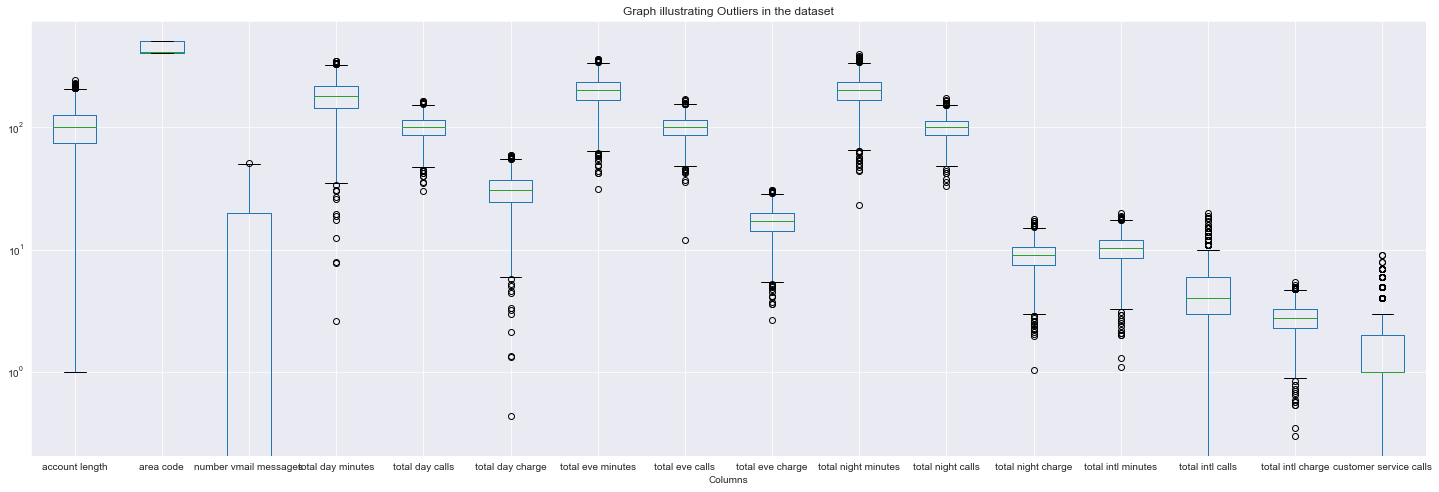

In [12]:
# lets visualize the ouliers of numerical columns

subset = data.select_dtypes(exclude=['object', 'bool'])
columnss = subset.columns
data[columnss].boxplot(figsize=(25,8))
plt.yscale('log')
plt.title('Graph illustrating Outliers in the dataset')
plt.xlabel('Columns')
plt.show()

<b>Conclusion</b>: Outliers as shown above will not be removed.
<br>
<b>Justification</b>:

* They are true outliers. Most of the ouliers revolve around talk duration on the phone. It is plausible that a customer may talk for 350 minutes in a day either continuously or discretely.
* The length of the data is too small to drop the outliers ergo will not be touched.
    

### Summary on data preparation.

* The Data has no missing values.
* The Data has no duplicates.
* The unique column Phone Number has no duplicates
* Outliers as shown above will not be removed, see justification above.

<h2>4. Exploratory Data Analysis</h2>

In this section, we will explore univariate EDA and bivariate EDA.
* Overall churn ratio.
* Churn against states.
* Churn against international plan.
* Churn against voice mail plan.
* Churn against number of customer service calls.
    

<h3>4.1. Univariate Analysis</h3>

<h5>Overall churn ratio</h5>

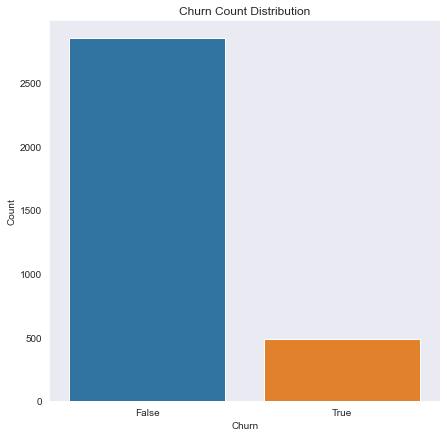

In [13]:
# lets see the churn rate
churn_ratio = data['churn'].value_counts()

plt.figure(figsize=(7,7))
sns.barplot(x=churn_ratio.index, y=churn_ratio.values)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count Distribution')
plt.show()

<b>Intepretation</b>

* From the graph above we can see that the churn ratio is imbalanced. This is good news for the company as the goal is to make profit and this is only realized if customers stay with the business.
* Further reduction in churn is what the project seeks to aid in
* When it comes to modelling, due to the imbalance issue, we will have to employ oversampling techniques such as SMOTE so that we avoid overfitting.

<h3>4.2. Bivariate Analysis</h3>

<h5>Churn ratio categorised according to states</h5>

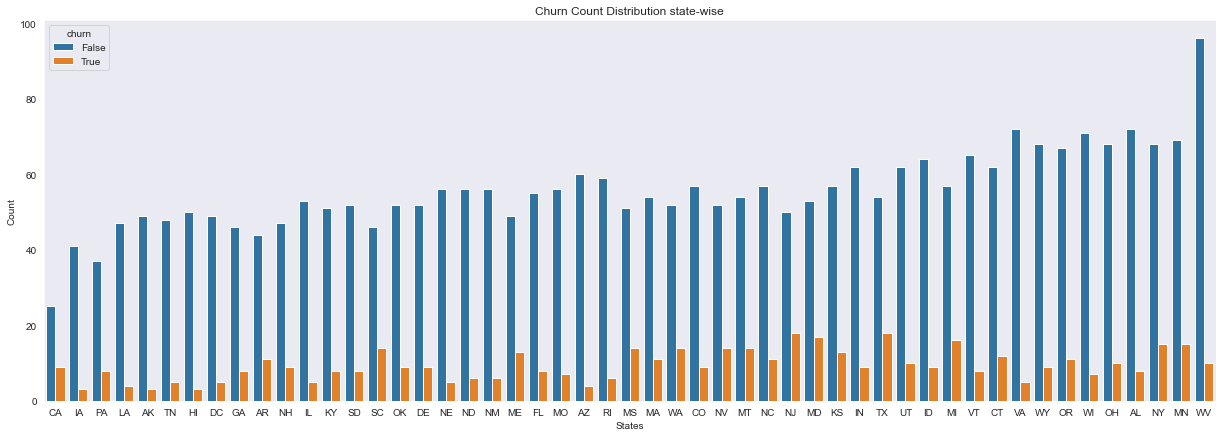

In [14]:
# lets see see churn state wise
state_group = data.groupby('state')['churn'].value_counts().reset_index(name='count')
# Calculate the ascending order of states based on churn count
ascending_order = state_group.groupby('state')['count'].sum().sort_values().index

plt.figure(figsize=(21,7))
sns.barplot(x='state', y='count', hue='churn', data=state_group, order=ascending_order)
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Churn Count Distribution state-wise')
plt.show()

<b>Intepretation</b>

* The graph above shows the distribution of churn count state wise.
* We can see that state NJ and TX have the highest churn count revealing that most of the customers there are likely to defect to other service providers.
* state WV has the lowest churn ratio.

<h5>Churn ratio categorised according to customers who have an international plan</h5>

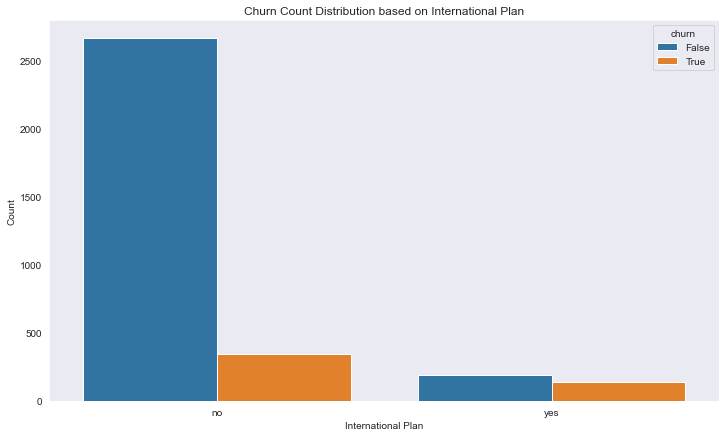

In [15]:
# lets compare churn to international plan
international_group = data.groupby('international plan')['churn'].value_counts().reset_index(name='count')

plt.figure(figsize=(12,7))
sns.barplot(x='international plan', y='count', hue='churn', data=international_group)
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.title('Churn Count Distribution based on International Plan')
plt.show()

<h4>Intepretation</h4>

* From the graph above it is evident that customers on the international plan were less likely to end their business with the company. It may be because the company offers the best international plan relative to other service providers.

<h5>Churn ratio categorised according to customers who have a Voice mail plan</h5>

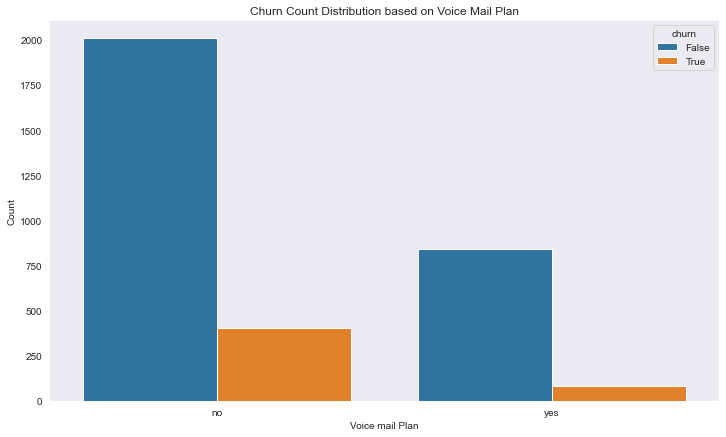

In [16]:
# lets see churn against voice mail plan

voicemail_group = data.groupby('voice mail plan')['churn'].value_counts().reset_index(name='count')

plt.figure(figsize=(12,7))
sns.barplot(x='voice mail plan', y='count', hue='churn', data=voicemail_group)
plt.xlabel('Voice mail Plan')
plt.ylabel('Count')
plt.title('Churn Count Distribution based on Voice Mail Plan')
plt.show()

<h4>Intepretation</h4>

* From the graph it is quite clear that customers who lacked a Voice mail plan churned more relative to those who had it. The company should look into possibly giving all their customers a voice mail plan.

<h5>Churn ratio categorised according to number of customer service calls</h5>

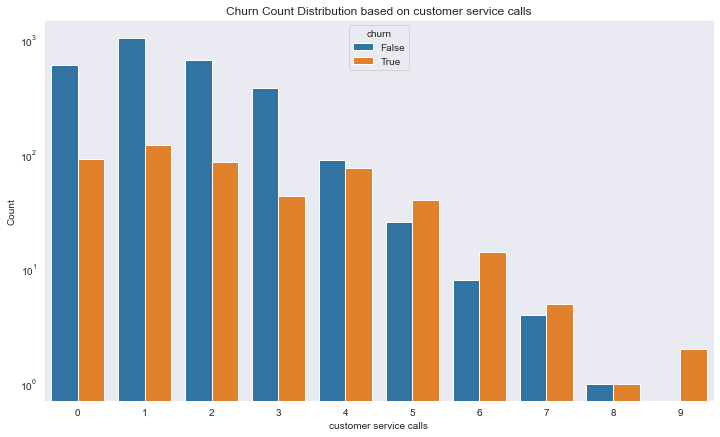

In [17]:
# lets see churn against customer service calls

customer_group = data.groupby('customer service calls')['churn'].value_counts().reset_index(name='count')

plt.figure(figsize=(12,7))
sns.barplot(x='customer service calls', y='count', hue='churn', data=customer_group)
plt.yscale('log')
plt.xlabel('customer service calls')
plt.ylabel('Count')
plt.title('Churn Count Distribution based on customer service calls')
plt.show()

<h4>intepretation</h4>

* From the graph it is evident that Most of the churn numbers came from customers who had called the telecom company atleast once.
* This may be an indication that after the call their issues were likely not sorted or they received bad customer service.
* Past 4 customer service calls resulted in an increase in churn rate where more customers dropped off from the service provider relative to those who did not drop off.
* This may be an indication that customer service is a big contributor to churn.

### summary of EDA 

* From the analysis above it is evident that the areas explored need to be considered when improving services of the company.
* More features will be explored in modelling to add on to the recommendations.

<h2>5. Preprocessing</h2>

* In this section we will prepare the data for modeling.
* Some of the preprocessing that will take place here include:
> * Feature selection.
> * Train test split.
> * Encoding: dummy encoding and basic replace application.

<b>Simple is better than Complex</b>

<h3>5.1. Feature selection</h3>

* Here we investigate the important features of the data set and choose them to reduce complexity of the models ergo avoiding overfitting from the get go.
* The criteria used to select relevant columns is <b>domain knowledge and feature importance analysis provided by decision trees.</b>.
* Based on telecom domain knowledge, the following features may be relevant for churn prediction:
> * state - The geographic location of the customer could potentially play a role in churn behavior, as different states may have varying levels of competition, coverage, or customer preferences.
> * account length - The duration of the customer's account with the telecom company may provide insights into customer loyalty and the likelihood of churn.
> * international plan - This feature indicates whether the customer has an international calling plan.
> * voice mail plan and number vmail messages - These features capture whether the customer has a voicemail plan and the number of voicemail messages.
> * customer service calls - The number of customer service calls made by the customer could indicate dissatisfaction or issues that may lead to churn.
> * 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge': These features represent the usage and charges for different time periods (day, evening, night, international). Usage patterns and charges across different time periods can provide insights into customer behavior and preferences.

In [18]:
# with the info above, the following columns were seen fit for the job

relevant_columns = ['state',  
                    'international plan', 
                    'voice mail plan', 
                    'number vmail messages', 
                    'total day minutes', 
                    'total day calls', 
                    'total day charge', 
                    'total eve minutes', 
                    'total eve calls', 
                    'total eve charge', 
                    'total night minutes', 
                    'total night calls', 
                    'total night charge', 
                    'total intl minutes', 
                    'total intl calls', 
                    'total intl charge', 
                    'customer service calls', 
                    'churn']

* This will serve as the features we will serve to our baseline model.
* Afterwards we will plot the feature importance to see how each feature contributes to the target, resulting in a further scaling down in the number of predictors.

### 5.2. Train-test Split

In [19]:
# creating a subset containing the relevant columns
subset_data = data.loc[:, relevant_columns]
subset_data.shape

(3333, 18)

In [20]:
# splitting to target and predictors
x = subset_data.drop('churn', axis=1)
y = subset_data['churn']

In [21]:
# library
from sklearn.model_selection import train_test_split

# splitting to train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

### 5.3. Dummy encoding and replace

In [22]:
# function to convert yes/no columns to 1/0

def convert_columns_to_numeric(df, columns_to_convert):
    for i in columns_to_convert:
        df[i] = df[i].replace({'no': 0, 'yes': 1})
    
    return df

con_columns = ['international plan', 'voice mail plan']

x_train = convert_columns_to_numeric(x_train, con_columns)
x_test = convert_columns_to_numeric(x_test, con_columns)


<h5>encoding categorical columns</h5>


In [23]:
# we encode state and phone number columns

string_cols = ['state']

# encoding with pd.get_dummies
x_train_encoded = pd.get_dummies(x_train, columns=string_cols)
x_test_encoded = pd.get_dummies(x_test, columns=string_cols)

<h2>6. Modelling</h2>

* In this section is where the magic happens.
* The problem at hand is a classification problem.
* We will explore 3 models: a baseline DecisionTreeClassifier, a randomforest classifier and a tuned random forest model.
* Model accuracy and F1 score will be the metrics for evaluation.
> <b>Justification</b>: Accuracy to get a verdict if a customer churns or not. F1 score to get a balance between precision and recall.
* Accuracy of 70% and F1 score of 70% will be the threshold to deam the model as successful.

#### Building a regular tree as a baseline

In [24]:
# library
from sklearn.tree import DecisionTreeClassifier as dtc

# creating an instance 
base_tree = dtc()
# fitting
base_tree.fit(x_train_encoded, y_train)

DecisionTreeClassifier()

### Evaluating base model

In [25]:
# lets check the accuracy on training set
from sklearn.metrics import accuracy_score, f1_score

y_train_pred = base_tree.predict(x_train_encoded)
accuracy = accuracy_score(y_train, y_train_pred)
f1score = f1_score(y_train, y_train_pred)

print("Accuracy on the training set:", accuracy)
print("F1 score of the model on train set:", f1score)

Accuracy on the training set: 1.0
F1 score of the model on train set: 1.0


In [26]:
# lets check the accuracy on the test set

y_test_pred = base_tree.predict(x_test_encoded)
accuracy = accuracy_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print("Accuracy on the testing set:", accuracy)
print("F1 score of the model on test set:", f1score)

Accuracy on the testing set: 0.9220389805097451
F1 score of the model on test set: 0.7450980392156863



* lets check <b>feature importance</b>.
> We quickly examine how important each feature ended up being in our decision tree model.

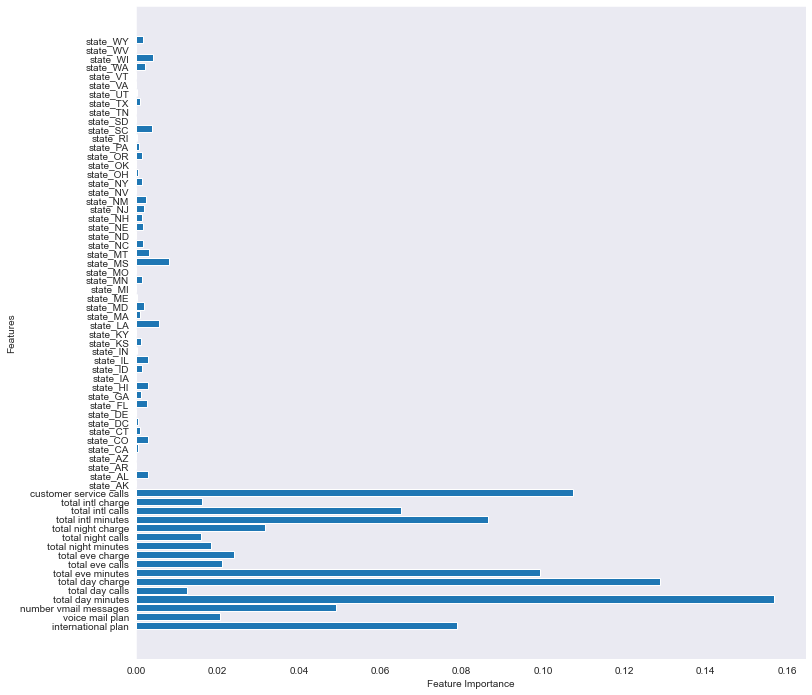

In [27]:
# we plot a horizontal bar graph to view feature importance

def plot_feature_importance(model):
    """function that takes in a model and plots feature importance"""
    
    n_features = x_train_encoded.shape[1] # taking number of columns in x_train_encoded
    plt.figure(figsize=(12,12))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train_encoded.columns.values)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')


plot_feature_importance(base_tree)

<h4>Interpretation</h4>

* From the graph it is clear that the encoded states had little effect to how the model performs. Contrary to what we had thought, the state column is not important, its actually causing overfitting. 
* Moving forward state, total int charge, voice mail plan will be removed fom relevant columns.

### Machine Learning Communication - baseline model

#### Rationale why modeling was implemented.
* While simpler forms of data analysis, such as descriptive statistics or basic data visualization, can provide initial insights, they may not be sufficient for complex problems or large datasets. Machine learning leverages advanced algorithms to uncover hidden patterns.

#### Results.

> * Accuracy on the training set: 1.0
> * F1 score of the model on train set: 1.0

> * Accuracy on the testing set: 0.92
> * F1 score of the model on test set: 0.75

> * The model is <b>overfitting</b>

* The accuracy means that the model can predict with an accuracy of <b>92%</b> whether a customer will churn or not.

* From the graph one can see how each predictor was important in modeling. 

#### Limitations of baseline model.
* The current model is not fit for prediction since it is not generalizing well to new data even with high accuracy. The model is <b>overfitting</b>. 
* This we see from the 7% difference between train and test accuracy.
* This we see from the large difference between train and test F1-score




### Model 2

* Building an ensemble model with hyperparameters.
* Different from base model in that we employ an ensemble model with hyperparameters to battle overfitting, employing SMOTE to handle the imbalance issue and scaling down of features also to battle overfitting.

#### Rationale why ensemble modeling will be implemented.
* While simpler forms of data analysis, such as descriptive statistics or basic data visualization, can provide initial insights, they are not sufficient for complex problems or large datasets such as this one. Ensemble models leverages advanced algorithms to uncover hidden patterns, make accurate predictions, and provide actionable insights that can greatly benefit SyriaTel in decision-making processes.


#### Dropping irrelevant columns

* <b>Justification</b>: From the last model we see that <b>state, total intl charge and voicemail plan</b> contribute least to the model performance.

In [28]:
# dropping 'state, total int charge, voice mail plan'
x_train = x_train.drop(['state', 'total intl charge', 'voice mail plan'], axis=1)
x_test = x_test.drop(['state', 'total intl charge', 'voice mail plan'], axis=1)

#### Handling the class imbalance issue

In [29]:
# lets try random forest and oversampling
from sklearn.ensemble import RandomForestClassifier as rfc
from imblearn.over_sampling import SMOTE

# Perform SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# initalise model with n_estimators(number of trees) and max_depth
forest_model = rfc(n_estimators=100, max_depth=5)
# fitting model
forest_model.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5)

### Evaluating forest model

In [30]:
# lets check the accuracy on training set

y_train_forest_pred = forest_model.predict(x_train)
accuracy = accuracy_score(y_train, y_train_forest_pred)
f1score = f1_score(y_train, y_train_forest_pred)

print("Accuracy on the training set:", accuracy)
print("F1 score of the model on train set:", f1score)

Accuracy on the training set: 0.9152288072018004
F1 score of the model on train set: 0.7341176470588234


In [31]:
# lets check the accuracy on the test set

y_test_forest_pred = forest_model.predict(x_test)
accuracy = accuracy_score(y_test, y_test_forest_pred)
f1score = f1_score(y_test, y_test_forest_pred)

print("Accuracy on the testing set:", accuracy)
print("F1 score of the model on test set:", f1score)

Accuracy on the testing set: 0.8950524737631185
F1 score of the model on test set: 0.6902654867256638


### lets see feature importance for this model

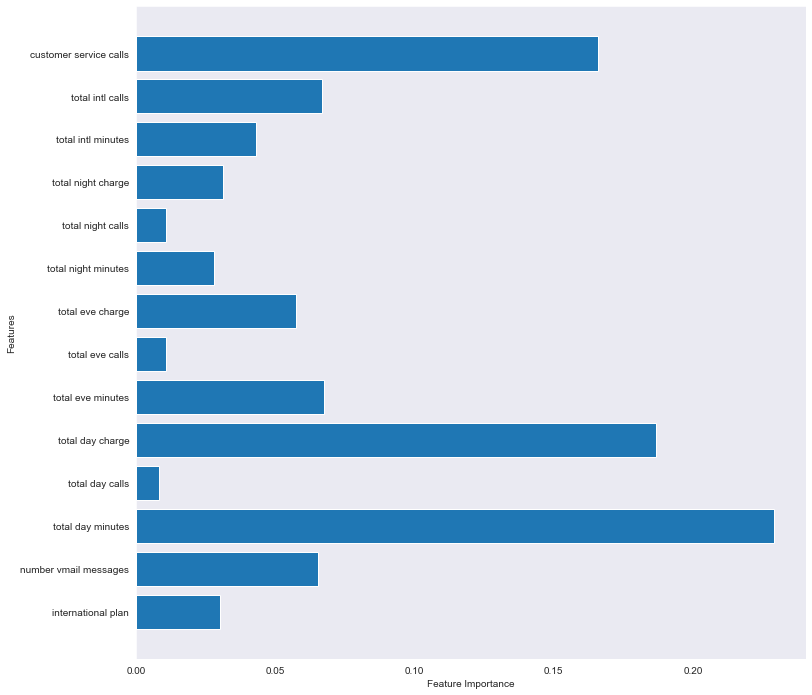

In [32]:
# we plot a horizontal bar graph to view feature importance

def plot_feature_importance(model):
    """function that takes in a model and plots feature importance"""
    
    n_features = x_train.shape[1] # taking number of columns in x_train_encoded
    plt.figure(figsize=(12,12))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train.columns.values)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')


plot_feature_importance(forest_model)

<interpretation>

<interpretaiton>

<h4>Interpretation</h4>
 
* 'total day minutes', 'total day charge', 'customer service calls', are the biggest predictors that of the target.

### Machine Learning Communication.

#### Results.

> * Accuracy on the training set: 0.92
> * F1 score of the model on train set: 0.73

> * Accuracy on the testing set: 0.89
> * F1 score of the model on test set: 0.69

> * The model is <b>not overfitting</b> but it is exhibiting issues because the test scores are higher than train. This may be due to data leakage, random variations or training size.

* The accuracy means that the model can predict with an accuracy of <b>89%</b> whether a customer will churn or not.

* From the graph one can see how each predictor was important in modeling. 

#### Limitations.
* The current model is not fit for prediction since it is experiencing higher test scores indicating internal issues e.g random variations, data leakage etc. 
* This we see from the difference between train and test accuracy.
* This we see from the difference between train and test F1-score.

### Model 3

* Building a model using grid searchCV to find best set of hyper-parameters.
* Different from base model and Model 2 in that we employ an ensemble model with grid searchCV to find the best set of hyperparameters to battle overfitting while improving accuracy and F1 score.
* Employing SMOTE to handle the imbalance issue and scaling down of features also to battle overfitting.
* Employing cross validation to tackle the random variation issue.

#### Rationale why tuned ensemble modeling will be implemented using grid searchCV.
* While simpler forms of modelling and data visualization, can provide initial insights, they are not sufficient for battling overfitting. Grid search and tuned Ensemble models leverages advanced algorithms to uncover hidden patterns, make accurate predictions, provide actionable insights and battle overfitting by finding the best set of hyperparameters. This greatly benefits SyriaTel in decision-making processes.


In [33]:
# importing the necessary libraries
from sklearn.model_selection import GridSearchCV

# initializing model
forest_model2 = rfc(random_state=42)

In [34]:
# next we setup a grid search to find the best hyperparameters
grid = [{
    'n_estimators': [100],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}]

#### define grid search
* estimator as forest_model2
* the parameter grid
* 5-fold cross validation

In [35]:
# define grid search
gridsearch = GridSearchCV(estimator=forest_model2,
                         param_grid=grid, 
                         cv=5)

In [36]:
# fit the training data
gridsearch.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [4, 5, 6], 'min_samples_leaf': [1, 3, 5],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [100]}])

In [37]:
# lets see the best set of hyperparameters
gridsearch.best_params_

{'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

####  explanation on what the parameters mean:
* 'max_depth': 6 - The maximum depth of the tree. 
* 'min_samples_leaf': 1 - The minimum number of samples required to be at a leaf node.
* 'min_samples_split': 2 - The minimum number of samples required to split an internal node.
* 'n_estimators': 100 - refers to the number of trees in the forest.

In [38]:
# now we fit a new model with these parameters
forest_model3 = rfc(n_estimators=100, max_depth=6, min_samples_leaf=1, min_samples_split=2, random_state=42)
forest_model3.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=6, random_state=42)

In [39]:
# lets check the accuracy on training set

y_train_grid_pred = forest_model3.predict(x_train)
accuracy = accuracy_score(y_train, y_train_grid_pred)
f1score = f1_score(y_train, y_train_grid_pred)

print("Accuracy on the training set:", accuracy)
print("F1 score of the model on train set:", f1score)

Accuracy on the training set: 0.9302325581395349
F1 score of the model on train set: 0.774818401937046


In [40]:
# lets check the accuracy on the test set

y_test_grid_pred = forest_model3.predict(x_test)
accuracy = accuracy_score(y_test, y_test_grid_pred)
f1score = f1_score(y_test, y_test_grid_pred)

print("Accuracy on the testing set:", accuracy)
print("F1 score of the model on test set:", f1score)

Accuracy on the testing set: 0.9160419790104948
F1 score of the model on test set: 0.7358490566037735


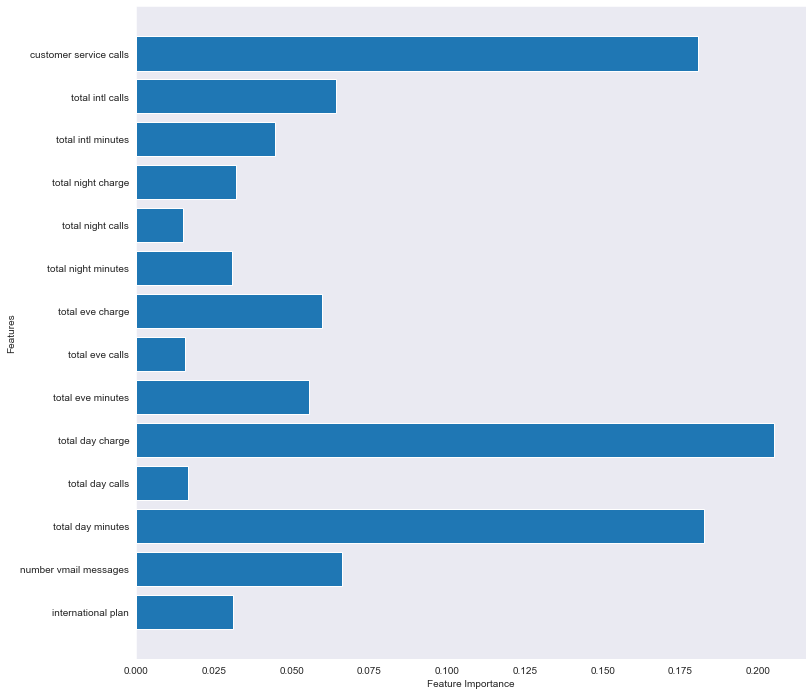

In [41]:
# feature importance.
plot_feature_importance(forest_model3)

<h4>Interpretation</h4>
 
* 'total day minutes', 'total day charge', 'customer service calls', are the biggest predictors that of the target.

### Machine Learning Communication.

#### Results.

> * Accuracy on the training set: 0.93
> * F1 score of the model on train set: 0.78

> * Accuracy on the testing set: 0.92
> * F1 score of the model on test set: 0.74

> * The model is <b>not overfitting</b>. It is now performing as expected.

* The accuracy means that the model can predict with an accuracy of <b>92%</b> whether a customer will churn or not.

* From the graph one can see how each predictor was important in modeling. 

#### Limitations.
* The current model is fit for prediction since the difference between train and test scores is proper. 
* This we see from the difference between train and test accuracy.
* This we see from the difference between train and test F1-score.

## Best Model: Model 3

### Justification.
* Model 3 proved to have a balanced performance on train and test instances. It demonstrated proper metrics with accuracy score of 92%.
* Overall it did not overfit.

## 7. Findings and Recommendations

### 7.1. Findings.
The following findings were found:
1. From the modelling exercise, the 3rd model was the best and was able to predict the target with an accuracy of 92%. This means given customer features, it is able to predict churn/no churn with an accuracy of 92%.
2. The features that heavily determine churn are <b>total day minutes, total day charge, customer service calls</b>
3. Findings from EDA are also taken into account.

### 7.2. Recommendations.
The following recommendations were made based on the whole exercise:

1. Improve Service Quality and Customer Experience: High customer service calls may indicate that customers are experiencing issues or dissatisfaction with the service. To reduce churn, the company should focus on improving service quality, addressing customer concerns promptly, and providing excellent customer support. This can be achieved through staff training, efficient complaint resolution processes, and regular feedback collection to identify and rectify service gaps.
2. Review Pricing Strategies: Since total day minutes and total day charge are influential factors in churn, it is crucial to evaluate the pricing structure and competitiveness. Consider conducting market research and competitor analysis to ensure that the company's pricing is competitive and aligned with customers' expectations. Offering attractive plans, discounts, or incentives for loyal customers can help retain them and discourage churn.
3. Proactive Customer Engagement and Retention Programs: Rather than waiting for customers to reach out with issues or complaints, the company can proactively engage customers through personalized communication and retention programs. This can include sending targeted offers, exclusive promotions, and customized recommendations based on customers' usage patterns and preferences. Building strong relationships with customers and providing them with incentives to stay can significantly reduce churn rates.
4. Analyze Churn Patterns and Predictive Modeling: Add more data on churn to analyze patterns and trends. Implement predictive modeling techniques in the current systems, to forecast customer churn probability based on various features. By identifying customers who are at high risk of churn, the company can proactively reach out to them with targeted retention strategies and offers, increasing the chances of retaining those customers.

### 7.3. Next steps

1. Gather more data to improve model accuracy.
2. Realize the project into a full software system.